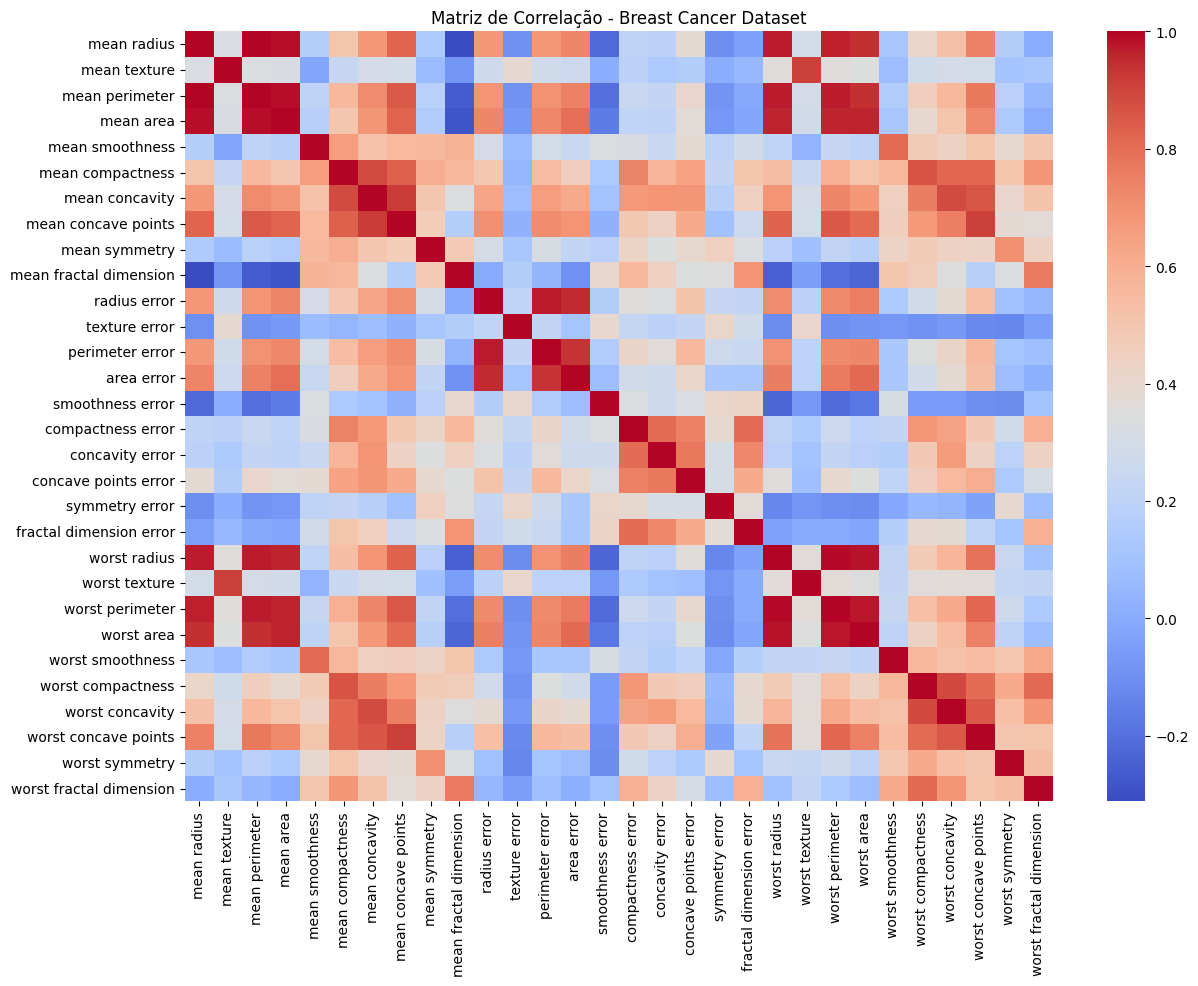

,model,accuracy,Precision,Recall,F1 Score
0,Decision tree,0.922807,0.937143,0.937143,0.937143
1,Random Forest,0.947368,0.949438,0.965714,0.957507
2,Gradient Boosting,0.943860,0.944134,0.965714,0.954802
3,XGBoost,0.947368,0.949438,0.965714,0.957507
4,LightGBM,0.943860,0.954286,0.954286,0.954286
5,KNN,0.968421,0.951087,1.000000,0.974930
6,SVM,0.968421,0.966292,0.982857,0.974504


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as decisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


dataset = load_breast_cancer()

x = dataset.data
y = dataset.target




df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

df_correlacao = df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(df_correlacao, cmap="coolwarm")
plt.title("Matriz de Correlação - Breast Cancer Dataset")
plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5, random_state=2)

sc = StandardScaler()

X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

X_train_st = pd.DataFrame(X_train_st, columns=dataset.feature_names)
X_test_st = pd.DataFrame(X_test_st, columns=dataset.feature_names)
results = []


xgb_params = {
    'n_estimators':  [100, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],

}

lgbm_params = {
    'n_estimators':  [100, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
}


knn_params = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ["uniform", "distance"],

}


dt_params = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
}

model = {
    "Decision tree": GridSearchCV(decisionTreeClassifier(), dt_params),
   "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": GridSearchCV(xgb.XGBClassifier(), xgb_params),
    "LightGBM": GridSearchCV(lgb.LGBMClassifier(verbosity=-1), lgbm_params ),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

for name, model in model.items():
    model.fit(X_train_st, Y_train)
    Y_pred = model.predict(X_test_st)

    results.append({
        'model': name,
        'accuracy': accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1 Score": f1_score(Y_test, Y_pred)
    })
df_results = pd.DataFrame(results)
display(df_results)


